# Detecting process with 2 stpes 
 - 1. first part is detecting the ROI : find the label printed area
 - 2. second part is classification problems : classify the which class is true or false

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from imageai.Detection.Custom import DetectionModelTrainer

In [3]:
trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()

In [4]:
data_dir = "./data/images/box/"
#model_dir = "./data/models/pretrained-yolov3.h5"
#model_dir = "./data/models/pretrained-yolov3.h5"
model_dir = f"./data/images/box/models/detection_model-ex-025--loss-0012.518.h5"

trainer.setDataDirectory(data_directory=data_dir)

In [5]:
trainer.setTrainConfig(object_names_array=['true'], 
                       batch_size=8, 
                       num_experiments=100, 
                       train_from_pretrained_model=model_dir)


Generating anchor boxes for training images and annotation...
[Errno 21] Is a directory: './data/images/box/train/annotations/.ipynb_checkpoints'
Ignore this bad annotation: ./data/images/box/train/annotations/.ipynb_checkpoints
Average IOU for 9 anchors: 0.88
Anchor Boxes generated.
Detection configuration saved in  ./data/images/box/json/detection_config.json


In [ ]:
trainer.trainModel()

Evaluating over 65 samples taken as 20.00% of the training set given at ./data/images/box/train
Training over 260 samples  given at ./data/images/box/train
Training on: 	['true']
Training with Batch Size:  8
Number of Training Samples:  260
Number of Validation Samples:  65
Number of Experiments:  100
Training with transfer learning from pretrained Model


/home/jupyter/.local/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/home/jupyter/.local/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/100
264/264 [==============================] - 418s 2s/step - loss: 20.1575 - yolo_layer_loss: 3.3468 - yolo_layer_1_loss: 6.1577 - yolo_layer_2_loss: 7.6606 - val_loss: 15.3810 - val_yolo_layer_loss: 2.0814 - val_yolo_layer_1_loss: 3.8357 - val_yolo_layer_2_loss: 6.5020
Epoch 2/100
 54/264 [=====>........................] - ETA: 4:18 - loss: 16.6138 - yolo_layer_loss: 1.8247 - yolo_layer_1_loss: 4.0053 - yolo_layer_2_loss: 7.8259

# Test the sample image

In [1]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()

In [2]:
model_path = "./data/images/box/models/detection_model-ex-004--loss-0016.549.h5"

In [3]:
detector.setModelPath(model_path) 
detector.setJsonPath("./data/images/box/json/detection_config.json")
detector.loadModel()

RuntimeError: Unable to get link info (addr overflow, addr = 126448, size = 328, eoa = 2048)

In [4]:
#sample_file = './data/images/box/train/images/b11.jpg'

In [5]:
sample_file_list = [f'./data/images/samples/s{i}.jpg' for i in range(0,19)]

In [36]:
idx = 9

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

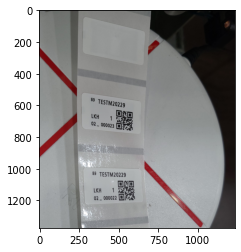

In [37]:
plt.imshow(plt.imread(sample_file_list[idx]))

In [38]:
detections = detector.detectObjectsFromImage(input_image=sample_file_list[idx], 
                                             output_image_path="tmp.jpg")

In [39]:
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

true  :  63.408273458480835  :  [257, 68, 670, 330]
true  :  65.9909725189209  :  [258, 532, 654, 761]
true  :  69.12685036659241  :  [281, 979, 647, 1222]


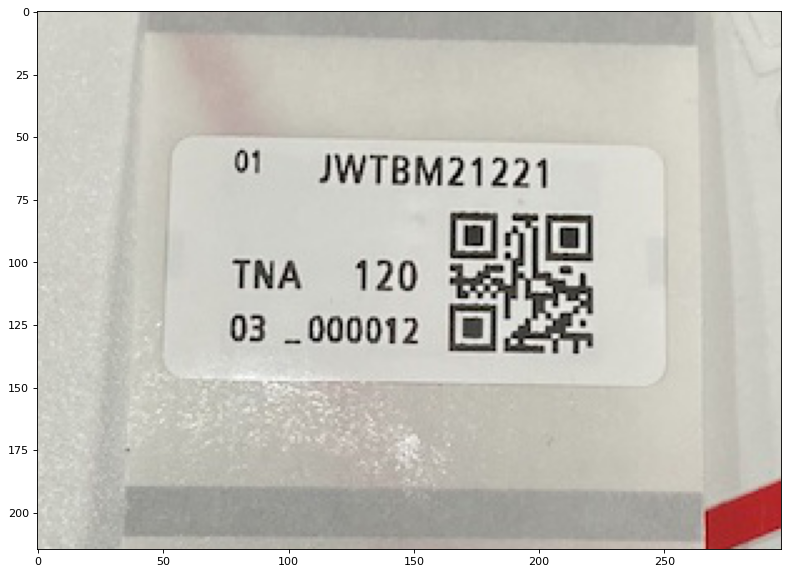

In [9]:
sample_file = './data/images/box/train/images/t24.jpg'
output_file = "t24_.jpg"
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path=output_file)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(plt.imread(output_file))

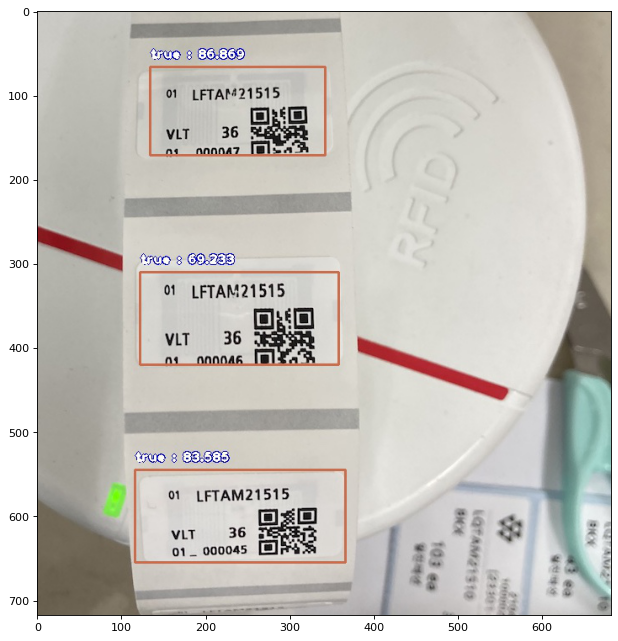

In [11]:
sample_file = './data/images/box/train/images/b13.jpg'
output_file = "p_b13_.jpg"
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path=output_file)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(plt.imread(output_file))

In [14]:
detections

[{'name': 'true',
  'percentage_probability': 70.62777876853943,
  'box_points': [154, 67, 365, 205]},
 {'name': 'true',
  'percentage_probability': 69.90768313407898,
  'box_points': [143, 349, 377, 482]}]

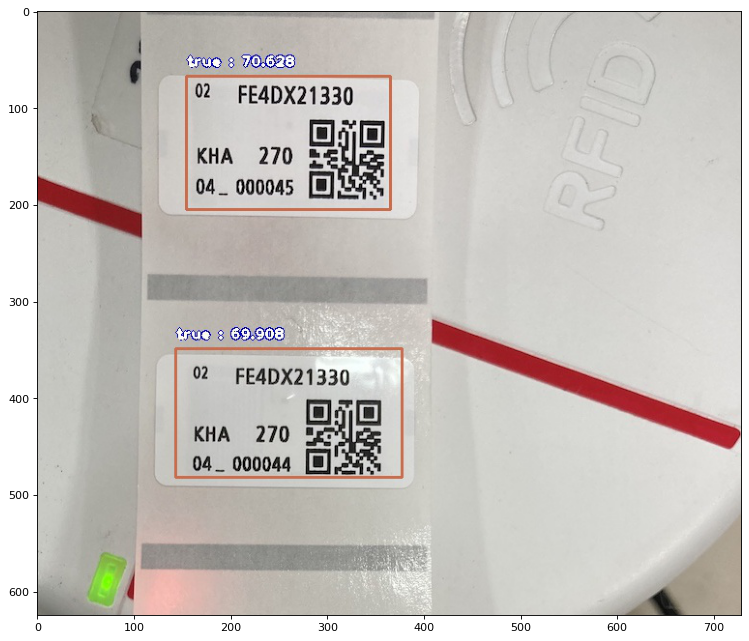

In [12]:
sample_file = './data/images/box/test/images/b23.jpg'
output_file = "p_b23_.jpg"
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path=output_file)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(plt.imread(output_file))


In [15]:
detections

[{'name': 'true',
  'percentage_probability': 70.62777876853943,
  'box_points': [154, 67, 365, 205]},
 {'name': 'true',
  'percentage_probability': 69.90768313407898,
  'box_points': [143, 349, 377, 482]}]

In [40]:
def extract_roi(image, outputs, pixels = 50):
    image_h, image_w, _ = image.shape
    
    roi_list = []
    for output in outputs:
        xmin, ymin, xmax, ymax = output['box_points']
        print ('Before :', xmin, ymin, xmax, ymax)
        xmin = max(0, xmin-pixels)
        ymin = max(0, ymin-pixels)
        xmax = min(image_w, xmax+pixels)
        ymax = min(image_h, ymax+pixels)
        print ('After :', xmin, ymin, xmax, ymax)
        roi_list.append(image[ymin:ymax,xmin:xmax,:])
    return roi_list
roi_list = extract_roi(plt.imread(output_file), detections)

Before : 154 67 365 205
After : 104 17 415 255
Before : 143 349 377 482
After : 93 299 427 532


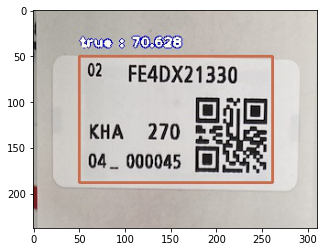

In [41]:
plt.imshow(roi_list[0])

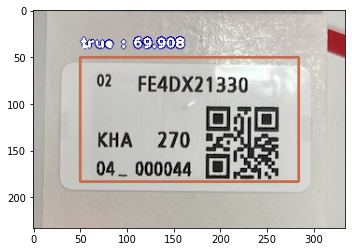

In [42]:
plt.imshow(roi_list[1])

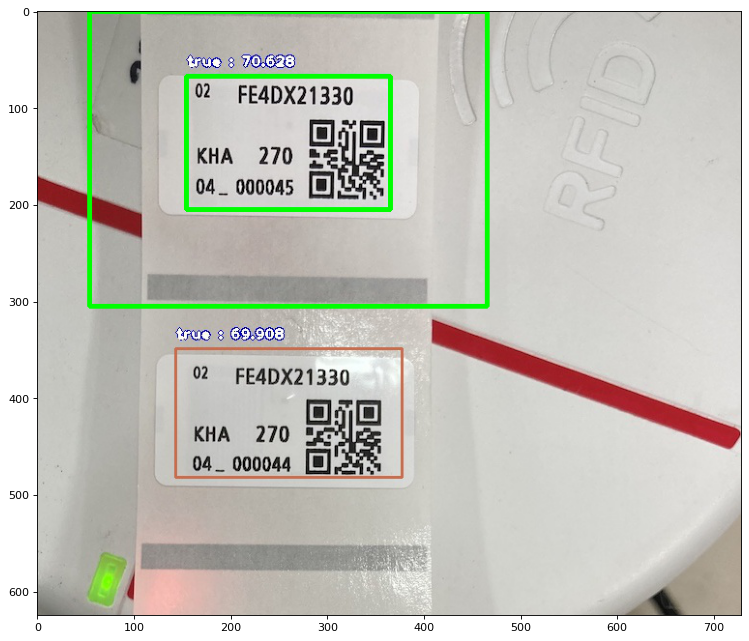

In [27]:
plt.imshow(draw_img_boxes(plt.imread(output_file), 
               [[154, 67, 365, 205], [54, 0, 465, 305]]))

In [12]:
sample_img = plt.imread(sample_file)
sample_img.shape

(832, 798, 3)

In [20]:
def draw_img_boxes(image, boxes, labels=None):
    image_h, image_w, _ = image.shape
    plt.figure(figsize=(12, 10), dpi=80)

    for idx, box in enumerate(boxes):
        
        xmin, ymin, xmax, ymax = box
        #xmin = int(box.xmin*image_w)
        #ymin = int(box.ymin*image_h)
        #xmax = int(box.xmax*image_w)
        #ymax = int(box.ymax*image_h)

        cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (0,255,0), 3)
        if labels is not None:
            cv2.putText(image, 
                        f"{labels[idx]} {probs[idx]:.2f}", 
                        (xmin, ymin - 13), 
                        cv2.FONT_HERSHEY_SIMPLEX, 
                        1e-3 * image_h, 
                        (0,255,0), 2)
        
    return image

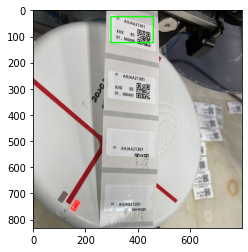

In [24]:
plt.imshow(draw_boxes(sample_img, [[297, 25, 459, 124]]))

In [25]:
def iou(box1, box2):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(box1[0], box2[0])
    yA = max(box1[1], box2[1])
    xB = min(box1[2], box2[2])
    yB = min(box1[3], box2[3])

    # compute the area of intersection rectangle
    intersection_area = abs(max((xB - xA, 0)) * max((yB - yA), 0))
    if intersection_area == 0:
        return 0
    # compute the area of both the prediction and ground-truth
    # rectangles
    box1_area = abs((box1[2] - box1[0]) * (box1[3] - box1[1]))
    box2_area = abs((box2[2] - box2[0]) * (box2[3] - box2[1]))

    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = intersection_area / float(box1_area + box2_area - intersection_area)

    # return the intersection over union value
    return iou
    

In [28]:
iou([297, 25, 459, 124], [297, 34, 456, 138]), iou([297, 34, 456, 138], [297, 25, 459, 124])

(0.783508541392904, 0.783508541392904)

In [29]:
detections

[{'name': 'false',
  'percentage_probability': 86.63533926010132,
  'box_points': [297, 25, 459, 124]},
 {'name': 'true',
  'percentage_probability': 87.49843239784241,
  'box_points': [297, 34, 456, 138]},
 {'name': 'false',
  'percentage_probability': 88.86523246765137,
  'box_points': [284, 227, 470, 337]},
 {'name': 'true',
  'percentage_probability': 89.229816198349,
  'box_points': [297, 237, 454, 348]},
 {'name': 'true',
  'percentage_probability': 78.8955807685852,
  'box_points': [287, 476, 438, 558]},
 {'name': 'false',
  'percentage_probability': 94.22956705093384,
  'box_points': [295, 473, 454, 562]},
 {'name': 'false',
  'percentage_probability': 91.32058024406433,
  'box_points': [289, 670, 433, 780]},
 {'name': 'true',
  'percentage_probability': 79.53984141349792,
  'box_points': [289, 670, 433, 780]},
 {'name': 'false',
  'percentage_probability': 63.33976984024048,
  'box_points': [282, 717, 442, 759]},
 {'name': 'true',
  'percentage_probability': 52.82893180847168,

In [30]:
tmp = [297, 34, 456, 138]

In [37]:
tmp[4:]

[]

In [59]:
def select_best_prediction(output_list, iou_trs=0.5):
    id_list = []
    label_list = []
    prob_list = []
    box_list = []
    best_iou_idx_list = []
    keep_idx_list = []
    for idx, output in enumerate(output_list):
        id_list.append(idx)
        label_list.append(output["name"])
        prob_list.append(output["percentage_probability"])
        box_list.append(output["box_points"])
        #keep_idx_list.append(0)
    
    for idx, box in enumerate(box_list):
        tmp_iou = 0
        tmp_idx = -1
        for idx2, tmp_box in enumerate(box_list[idx+1:]):
            if iou(box, tmp_box) > iou_trs and iou(box, tmp_box) > tmp_iou:
                tmp_iou = iou(box, tmp_box)
                if prob_list[idx] > prob_list[idx2+1]:
                    tmp_idx = idx 
                else:
                    tmp_idx = idx2+1
                    
        keep_idx_list.append(tmp_idx)
        
    print (keep_idx_list)
    
    selected_list = sorted(set(keep_idx_list))[1:]
    out_dict = {}
    out_dict['labels'] = [label_list[idx] for idx in selected_list]
    out_dict['probs'] = [prob_list[idx] for idx in selected_list]
    out_dict['boxes'] = [box_list[idx] for idx in selected_list]
    return out_dict
        

In [72]:
out = select_best_prediction(detections)
out

[1, -1, 1, -1, 1, -1]


{'labels': ['true'],
 'probs': [95.0419545173645],
 'boxes': [[130, 77, 334, 178]]}

In [18]:
def draw_boxes(image, boxes, probs, labels,):#, labels):
    image_h, image_w, _ = image.shape
    plt.figure(figsize=(12, 10), dpi=80)

    for idx, box in enumerate(boxes):
        
        xmin, ymin, xmax, ymax = box
        #xmin = int(box.xmin*image_w)
        #ymin = int(box.ymin*image_h)
        #xmax = int(box.xmax*image_w)
        #ymax = int(box.ymax*image_h)

        cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (0,255,0), 3)
        cv2.putText(image, 
                    f"{labels[idx]} {probs[idx]:.2f}", 
                    (xmin, ymin - 13), 
                    cv2.FONT_HERSHEY_SIMPLEX, 
                    1e-3 * image_h, 
                    (0,255,0), 2)
        
    return image

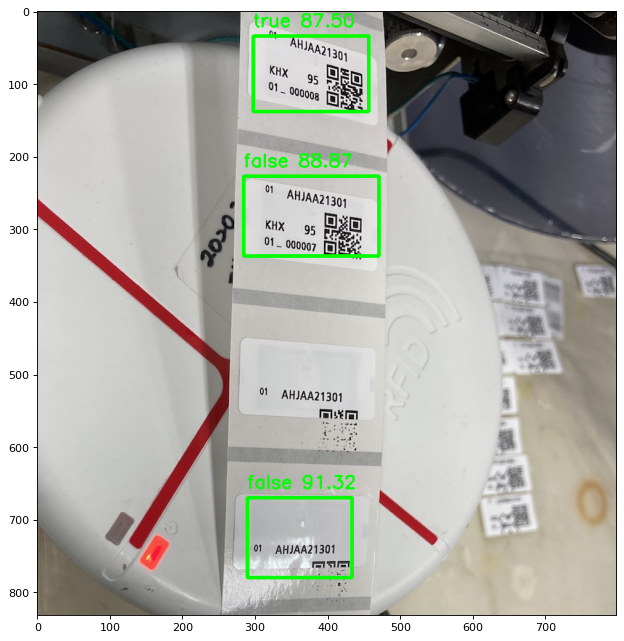

In [65]:
sample_img = plt.imread(sample_file)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(draw_boxes(sample_img, out['boxes'], out['probs'], out['labels']))

[1, -1, 1, -1, 1, -1]


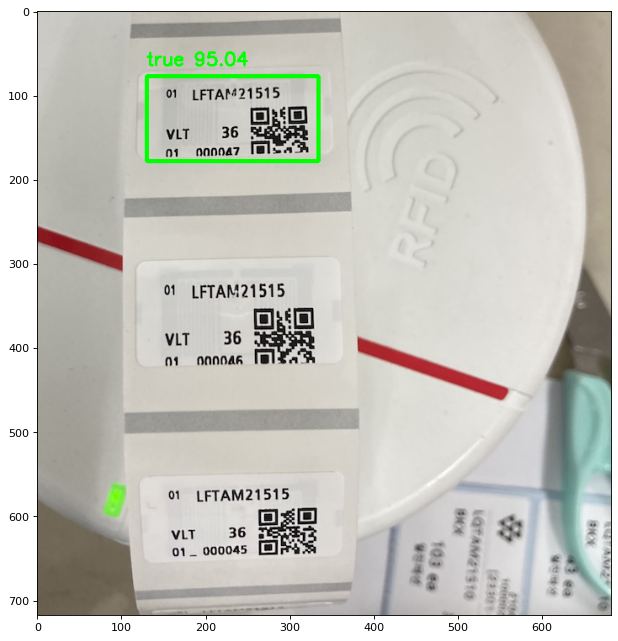

In [80]:
sample_file = './data/images/box/train/images/b13.jpg'
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path="p_b13_.jpg")
out = select_best_prediction(detections)
sample_img = plt.imread(sample_file)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(draw_boxes(sample_img, out['boxes'], out['probs'], out['labels']))

In [81]:
detections

[{'name': 'false',
  'percentage_probability': 92.28924512863159,
  'box_points': [147, 60, 317, 177]},
 {'name': 'true',
  'percentage_probability': 95.0419545173645,
  'box_points': [130, 77, 334, 178]},
 {'name': 'false',
  'percentage_probability': 92.87180304527283,
  'box_points': [148, 288, 337, 421]},
 {'name': 'true',
  'percentage_probability': 93.12414526939392,
  'box_points': [129, 317, 354, 433]},
 {'name': 'false',
  'percentage_probability': 88.36838006973267,
  'box_points': [128, 540, 360, 658]},
 {'name': 'true',
  'percentage_probability': 93.14985275268555,
  'box_points': [163, 558, 322, 662]}]

In [84]:
iou([128, 540, 360, 658],[129, 317, 354, 433])

0

In [ ]:
def select_best_prediction(output_list, iou_trs=0.5):
    id_list = []
    label_list = []
    prob_list = []
    box_list = []
    best_iou_idx_list = []
    keep_idx_list = []
    for idx, output in enumerate(output_list):
        id_list.append(idx)
        label_list.append(output["name"])
        prob_list.append(output["percentage_probability"])
        box_list.append(output["box_points"])
        #keep_idx_list.append(0)
    
    for idx, box in enumerate(box_list):
        tmp_iou = 0
        tmp_idx = -1
        for idx2, tmp_box in enumerate(box_list[idx+1:]):
            if iou(box, tmp_box) > iou_trs and iou(box, tmp_box) > tmp_iou:
                tmp_iou = iou(box, tmp_box)
                if prob_list[idx] > prob_list[idx2+1]:
                    tmp_idx = idx 
                else:
                    tmp_idx = idx2+1
                    
        keep_idx_list.append(tmp_idx)
        
    print (keep_idx_list)
    
    selected_list = sorted(set(keep_idx_list))[1:]
    out_dict = {}
    out_dict['labels'] = [label_list[idx] for idx in selected_list]
    out_dict['probs'] = [prob_list[idx] for idx in selected_list]
    out_dict['boxes'] = [box_list[idx] for idx in selected_list]
    return out_dict
        

[0, -1, 2, -1, 1, -1]


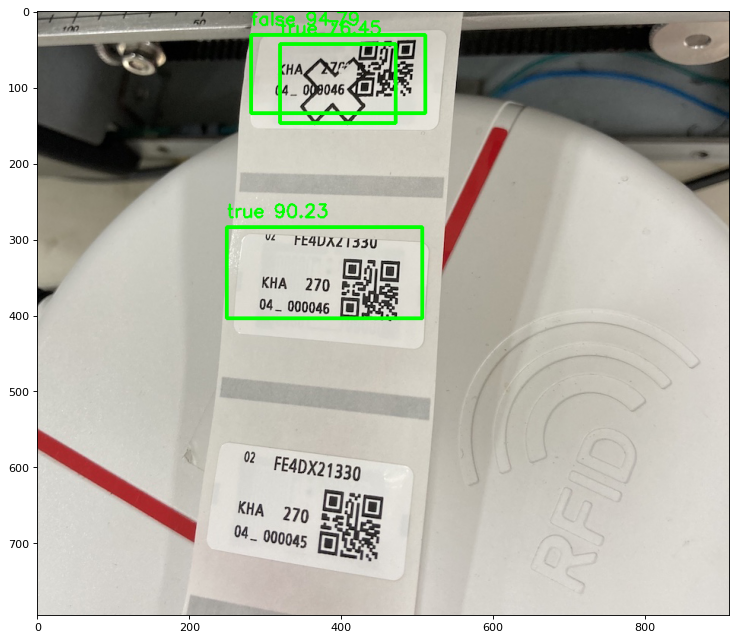

In [73]:
sample_file = './data/images/box/test/images/b22.jpg'
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path="p_b13_.jpg")
out = select_best_prediction(detections)
sample_img = plt.imread(sample_file)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(draw_boxes(sample_img, out['boxes'], out['probs'], out['labels']))

[1, -1]


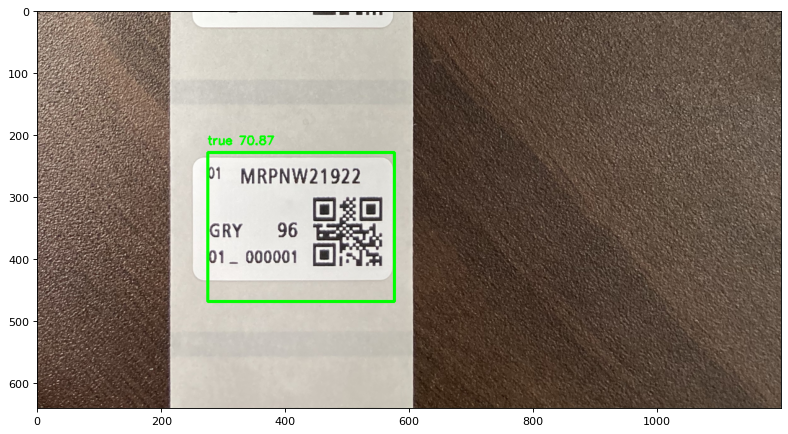

In [76]:
sample_file = './data/images/box/train/images/t19.jpg'
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path="p_b13_.jpg")
out = select_best_prediction(detections)
sample_img = plt.imread(sample_file)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(draw_boxes(sample_img, out['boxes'], out['probs'], out['labels']))

[0, -1, 2, -1]


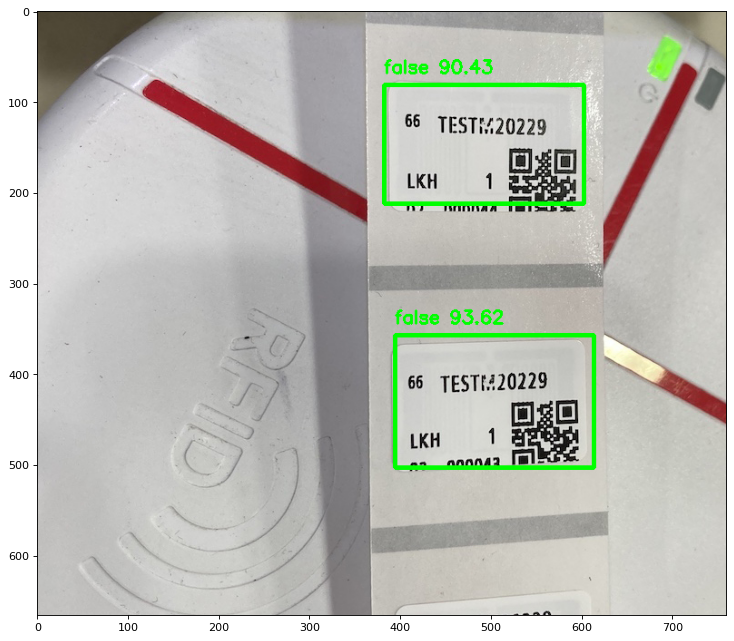

In [79]:
sample_file = './data/images/box/train/images/b5.jpg'
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path="p_b13_.jpg")
out = select_best_prediction(detections)
sample_img = plt.imread(sample_file)
plt.figure(figsize=(12, 10), dpi=80)
plt.imshow(draw_boxes(sample_img, out['boxes'], out['probs'], out['labels']))

In [75]:
detections

[]

In [9]:
sample_file = './data/images/box/train/images/b13.jpg'
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path="p_b13_.jpg")

In [10]:
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

false  :  93.75475645065308  :  [112, 62, 348, 177]
true  :  95.91119289398193  :  [106, 76, 354, 180]
false  :  94.87846493721008  :  [126, 294, 355, 416]
true  :  94.42676305770874  :  [111, 295, 353, 434]
false  :  93.03518533706665  :  [146, 532, 339, 649]
true  :  93.64821910858154  :  [145, 559, 339, 661]


In [11]:
sample_file = './data/images/box/test/images/b22.jpg'
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path="p_b22_.jpg")

In [12]:
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

false  :  65.20553827285767  :  [239, 25, 575, 119]
false  :  96.82616591453552  :  [313, 46, 475, 144]
true  :  82.15420246124268  :  [313, 46, 475, 144]
true  :  91.82233214378357  :  [250, 285, 501, 406]
false  :  83.94649624824524  :  [235, 296, 518, 417]
true  :  94.65339183807373  :  [226, 569, 464, 731]
false  :  82.59385824203491  :  [194, 584, 498, 738]


In [24]:
sample_file = './data/images/box/test/images/b23.jpg'
detections = detector.detectObjectsFromImage(input_image=sample_file, 
                                             output_image_path="p_b23_.jpg")

In [25]:
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

false  :  69.59227323532104  :  [145, 58, 375, 196]
true  :  88.564932346344  :  [143, 56, 376, 219]
false  :  76.68888568878174  :  [166, 321, 351, 487]
true  :  88.16186785697937  :  [122, 349, 393, 503]
